# **FULL DATASET BINARY**

### **Preliminary steps**

In [1]:
import os 
print(os.getcwd())
#os.chdir('../..')
print(os.getcwd())

/Users/Corentin/Desktop/ENSAE 2024-2025/S2/NLP/final project /ml-for-nlp
/Users/Corentin/Desktop/ENSAE 2024-2025/S2/NLP/final project /ml-for-nlp


In [17]:
### PACKAGES
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import shap
from sklearn.naive_bayes import MultinomialNB

In [18]:
### FUNCTIONS
from src.libs.preprocess_dataframe_train_test import load_all_datasets
from src.pipeline.whole_pipeline import punctuation_map_dimensions_to_names, punctuation_transform, punctuation_map_dimensions_to_names, fit_tfidf_embedding, transform_with_tfidf, train_fine_tune_RF, eval_model_binary, evaluate

In [19]:
### LOAD DATA

data = load_all_datasets()

### Global X, y
X_train = data["X_train"]
y_train = (data["y_train"]>0).astype(int)
X_test = data["X_test"]
y_test = (data["y_test"]>0).astype(int)

### Global dataframes
df_train = data["df_train"]
df_test = data["df_test"]

### By type: poetry, essay, story (train)
df_train_poetry = data["df_train_poetry"]
df_train_essay = data["df_train_essay"]
df_train_story = data["df_train_story"]
X_train_poetry = data["X_train_poetry"]
y_train_poetry = (data["y_train_poetry"]>0).astype(int)
X_train_essay = data["X_train_essay"]
y_train_essay = (data["y_train_essay"]>0).astype(int)
X_train_story = data["X_train_story"]
y_train_story = (data["y_train_story"]>0).astype(int)

### By type: poetry, essay, story (test)
df_test_poetry = data["df_test_poetry"]
df_test_essay = data["df_test_essay"]
df_test_story = data["df_test_story"]
X_test_poetry = data["X_test_poetry"]
y_test_poetry = (data["y_test_poetry"]>0).astype(int)
X_test_essay = data["X_test_essay"]
y_test_essay = (data["y_test_essay"]>0).astype(int)
X_test_story = data["X_test_story"]
y_test_story = (data["y_test_story"]>0).astype(int)

Time taken to load dataset: 0.11934423446655273 seconds
Time taken to load dataset: 0.013623714447021484 seconds
Time taken to load dataset: 0.4618990421295166 seconds
Time taken to load dataset: 0.011937141418457031 seconds
Time taken to load dataset: 0.013586759567260742 seconds
Time taken to load dataset: 0.10723304748535156 seconds
Time taken to load dataset: 0.04578113555908203 seconds
Time taken to load dataset: 0.010954856872558594 seconds
Time taken to load dataset: 0.01420903205871582 seconds


## **CLASSIFICATION USING PUNCTUATION & RANDOM FOREST**

In [20]:
### EMBEDDING

X_train_punct = punctuation_transform(X_train)
X_test_punct = punctuation_transform(X_test)
X_test_poetry_punct = punctuation_transform(X_test_poetry)
X_test_essay_punct = punctuation_transform(X_test_essay)
X_test_story_punct = punctuation_transform(X_test_story)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 173}


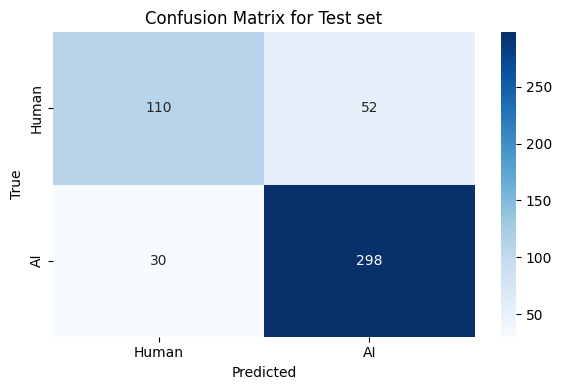

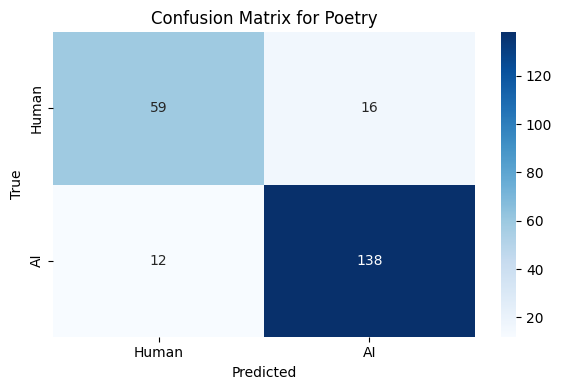

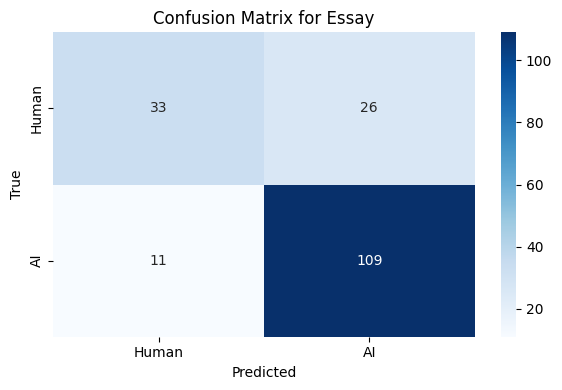

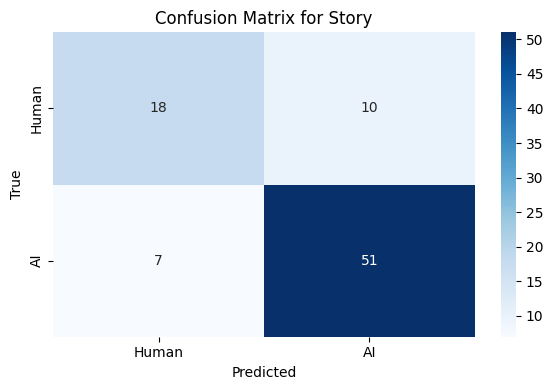

              confusion_matrix precision    recall        f1
test    [[110, 52], [30, 298]]  0.818571  0.793774  0.803766
poetry   [[59, 16], [12, 138]]  0.863545  0.853333  0.858057
essay    [[33, 26], [11, 109]]  0.778704  0.733828  0.747839
story      [[18, 10], [7, 51]]  0.778033  0.761084  0.768194


RandomForestClassifier(max_depth=18, n_estimators=173, n_jobs=-1,
                       random_state=42)

In [21]:
### CLASSIFIER


classifier_punct = train_fine_tune_RF(X_train_punct, y_train)
eval_model_binary(classifier_punct, X_train_punct, y_train, X_test_punct, y_test, X_test_poetry_punct, y_test_poetry, X_test_essay_punct, y_test_essay, X_test_story_punct, y_test_story)

In [22]:
### INTERPRETABILITY - FEATURE IMPORTANCE

dim_names_211 = punctuation_map_dimensions_to_names()
feature_importances_211 = classifier_punct.feature_importances_

most_important_features_211 = np.argsort(feature_importances_211)[-10:][::-1]

for i in most_important_features_211:
    print(f"{dim_names_211[i]}: {feature_importances_211[i]}")


ratio_words_per_sentence: 0.38654194120132973
ratio_odd_characters: 0.3160995706388693
ratio_punctuations: 0.297358488159801


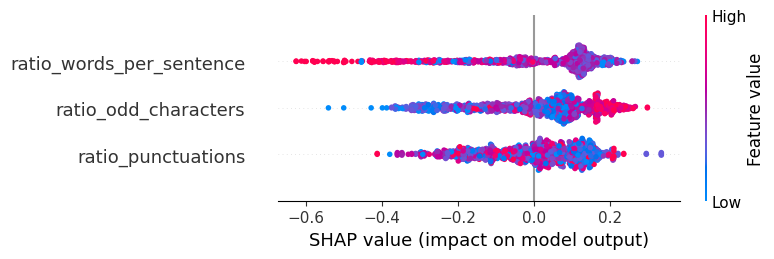

In [23]:
### INTERPRETABILITY - SHAP VALUES

explainer = shap.Explainer(classifier_punct)
X_train_dense = X_train_punct
shap_values  = explainer(X_train_dense)

shap.summary_plot(
    shap_values .values[:, :, 1], 
    features=X_train_dense,
    feature_names=dim_names_211
)

## **CLASSIFICATION USING TF-IDF & RANDOM FOREST**

In [39]:
### TF-IDF embedding
vectorizer_tfidf, X_train_tfidf = fit_tfidf_embedding(X_train, max_features=1000)

X_test_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test)
X_test_poetry_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test_poetry)
X_test_essay_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test_essay)
X_test_story_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test_story)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 173}


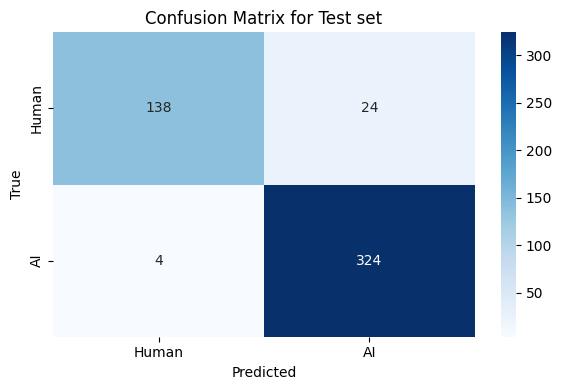

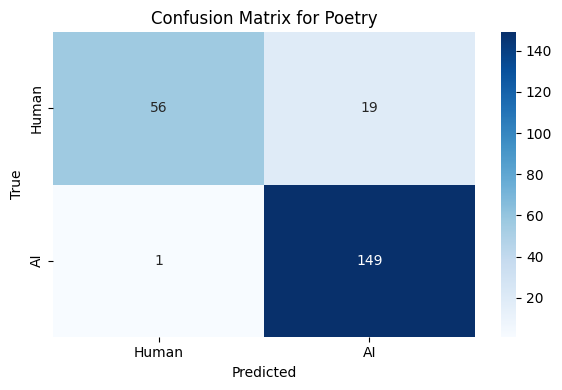

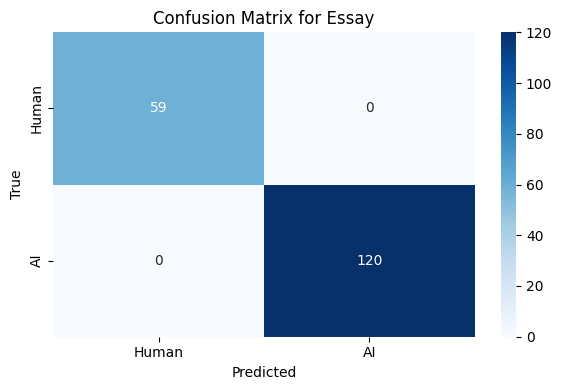

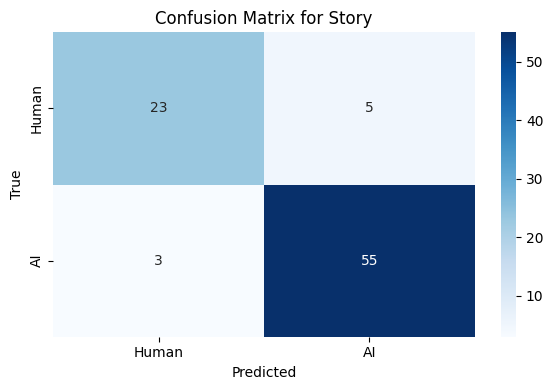

             confusion_matrix precision    recall        f1
test    [[138, 24], [4, 324]]  0.951433  0.919828  0.933237
poetry   [[56, 19], [1, 149]]   0.93468      0.87  0.892796
essay     [[59, 0], [0, 120]]       1.0       1.0       1.0
story      [[23, 5], [3, 55]]  0.900641  0.884852  0.892028


RandomForestClassifier(max_depth=18, n_estimators=173, n_jobs=-1,
                       random_state=42)

In [40]:
classifier_tfidf = train_fine_tune_RF(X_train_tfidf, y_train)
eval_model_binary(classifier_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test, X_test_poetry_tfidf, y_test_poetry, X_test_essay_tfidf, y_test_essay, X_test_story_tfidf, y_test_story)

In [41]:
### INTERPRETABILITY - FEATURE IMPORTANCE

dim_names_tfidf = vectorizer_tfidf.get_feature_names_out()
feature_importances_tfidf = classifier_tfidf.feature_importances_
most_important_features_tfidf = np.argsort(feature_importances_tfidf)[-20:][::-1]
for i in most_important_features_tfidf:
    print(f"{dim_names_tfidf[i]}: {feature_importances_tfidf[i]:.5f}")


really: 0.02838
think: 0.02491
just: 0.02371
like: 0.02157
room: 0.01768
man: 0.01632
going: 0.01579
help: 0.01407
don: 0.01373
mother: 0.01364
guess: 0.01278
says: 0.01224
minutes: 0.01162
kind: 0.01100
world: 0.01087
got: 0.01071
maybe: 0.01008
head: 0.00900
half: 0.00873
pretty: 0.00856


In [42]:
df_train

,text,abstract,label,type
90,Of course now children take it for granted but...,\r\r\n Problems of Translat...,0,poetry
386,"Life is a journey through endless time, A canv...",write a poetry about life,1,poetry
46,"On one hand, those who support targeted search...",As part of the “war on drugs” and in reaction...,1,essay
470,"Honesty is often seen as the best policy, and ...",Many people believe that honesty is the best ...,2,essay
159,There are many reasons to appreciate your pare...,Discuss reasons for appreciating your parents,2,essay
...,...,...,...,...
38,"In times of trouble and dismay, When darkness ...",write a poetry about hero,1,poetry
18,"I was always a fan of art, and I loved to spen...",Write a story about a character who discovers ...,2,story
672,"The Taste of Chocolate Oh, the taste of chocol...",write a poem about a taste you crave,2,poetry
499,If I were to choose one professional to travel...,If it were up to you to choose one profession...,1,essay


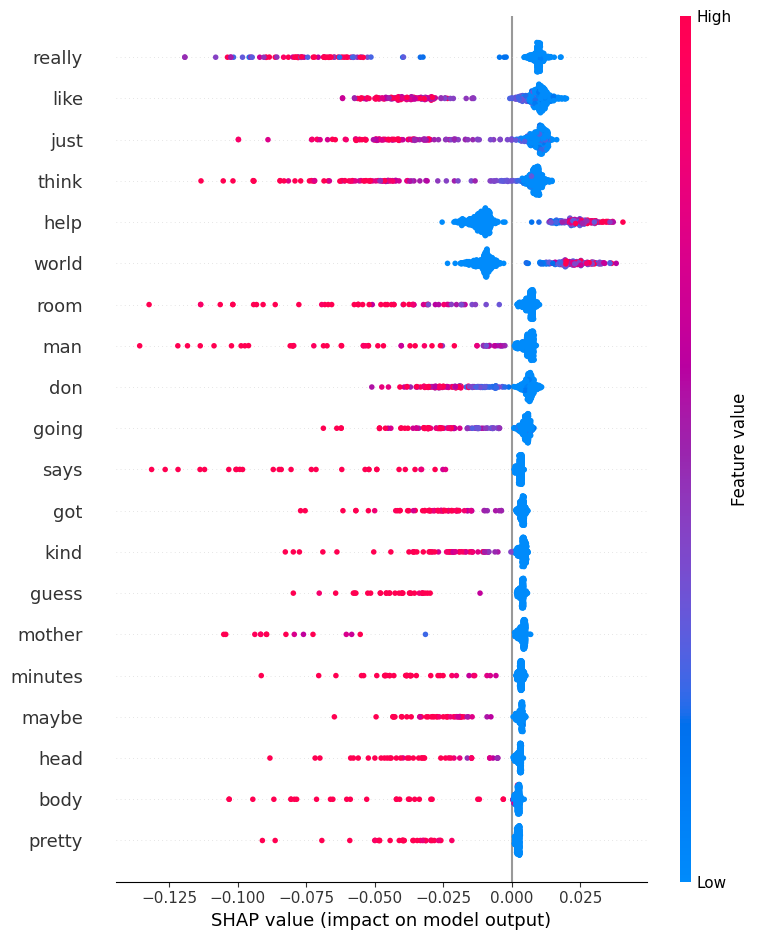

In [43]:
### INTERPRETABILITY - SHAP VALUES

X_test_tfidf_dense = X_test_tfidf.toarray()
explainer_tfidf = shap.TreeExplainer(classifier_tfidf)
shap_values_tfidf = explainer_tfidf(X_test_tfidf_dense)

shap.summary_plot(
    shap_values_tfidf[:,:,1],
    features=X_test_tfidf_dense,
    feature_names=dim_names_tfidf
)


## **CLASSIFICATION USING TF-IDF & NAIVE BAYES**

In [14]:
### TF-IDF embedding
vectorizer_tfidf, X_train_tfidf = fit_tfidf_embedding(X_train, max_features=1000)

X_test_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test)
X_test_poetry_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test_poetry)
X_test_essay_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test_essay)
X_test_story_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test_story)

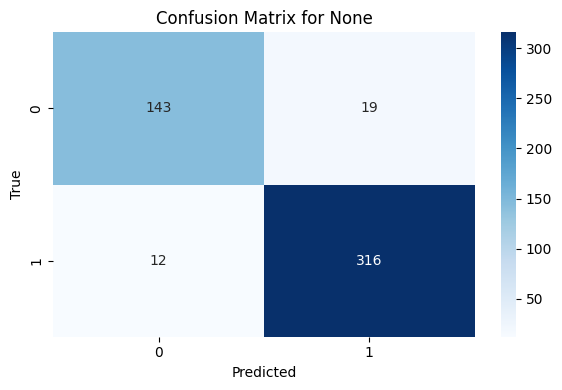

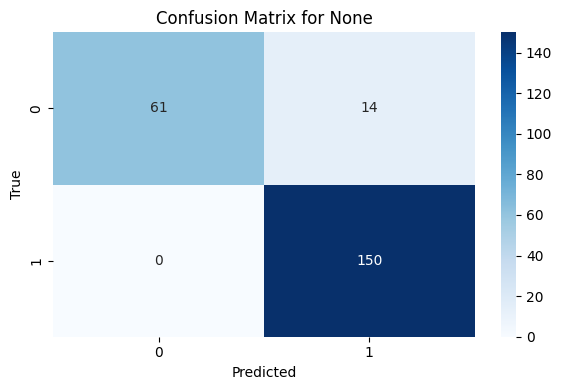

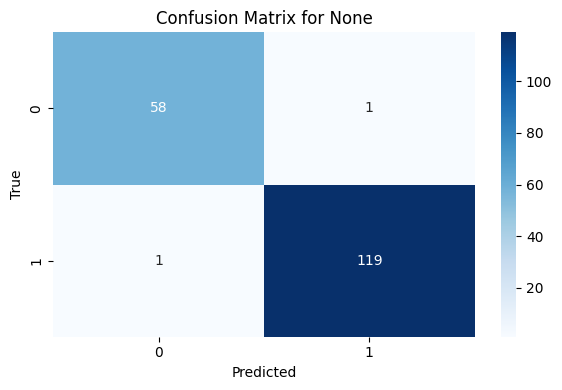

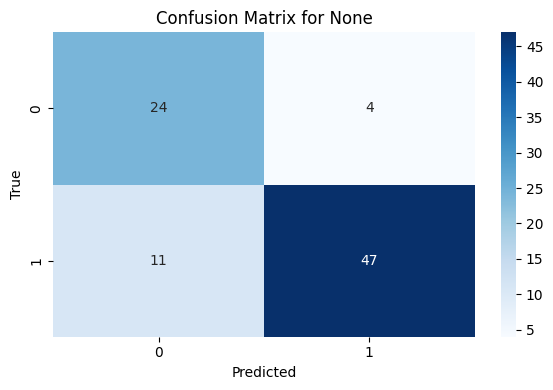

              confusion_matrix precision    recall        f1
test    [[143, 19], [12, 316]]  0.932932  0.923065  0.927726
poetry    [[61, 14], [0, 150]]  0.957317  0.906667  0.926236
essay      [[58, 1], [1, 119]]  0.987359  0.987359  0.987359
story      [[24, 4], [11, 47]]  0.803641  0.833744  0.812145


In [15]:
### CLASSIFIER

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

metrics_tfidf = evaluate(nb_classifier, X_test_tfidf, y_test)
metrics_poetry_tfidf = evaluate(nb_classifier, X_test_poetry_tfidf, y_test_poetry)
metrics_essay_tfidf = evaluate(nb_classifier, X_test_essay_tfidf, y_test_essay)
metrics_story_tfidf = evaluate(nb_classifier, X_test_story_tfidf, y_test_story)

results = {
    "test": metrics_tfidf,
    "poetry": metrics_poetry_tfidf,
    "essay": metrics_essay_tfidf,
    "story": metrics_story_tfidf
}
df_metrics = pd.DataFrame(results).T 
print(df_metrics.round(3)) 
